In [43]:
import pandas as pd
import networkx as nx


In [44]:
from google.colab import files


uploaded = files.upload()



Saving musae_facebook_edges.csv to musae_facebook_edges (2).csv


In [87]:
from google.colab import files


uploaded = files.upload()

Saving musae_facebook_target.csv to musae_facebook_target.csv


In [152]:
df1=pd.read_csv("musae_facebook_target.csv")

In [153]:
df2=pd.read_csv("musae_facebook_edges.csv")

In [154]:
df2.describe()

,id_1,id_2
count,171002.000000,171002.000000
mean,7880.865002,14617.111706
std,5576.987102,5508.263801
min,0.000000,14.000000
25%,3097.000000,10526.000000
50%,7062.000000,15568.000000
75%,11794.750000,19347.000000
max,22464.000000,22469.000000


In [155]:
df1.describe()

,id,facebook_id
count,22470.00000,2.247000e+04
mean,11234.50000,3.516802e+14
std,6486.67461,4.931380e+14
min,0.00000,5.298600e+09
25%,5617.25000,1.137972e+14
50%,11234.50000,1.957086e+14
75%,16851.75000,4.277323e+14
max,22469.00000,1.015016e+16


In [156]:
G=nx.Graph()
G.clear()

In [157]:
df1.count()

id             22470
facebook_id    22470
page_name      22470
page_type      22470
dtype: int64

In [158]:
df2.count()

id_1    171002
id_2    171002
dtype: int64

In [159]:
for i in range(0,22470):
  ob=list(df1.loc[i])
  node1=int(ob[0])
  G.add_node(node1)

In [160]:
for i in range(0,171002):
  ob=list(df2.loc[i])
  node1=int(ob[0])
  node2=int(ob[1])
  G.add_edge(node1,node2)

In [161]:
len(list(G.nodes))

22470

In [176]:
high_degree_nodes = [node for node in G.nodes if G.degree[node] > 10]
len(list(high_degree_nodes))


8539

In [177]:
H = G.subgraph(high_degree_nodes)

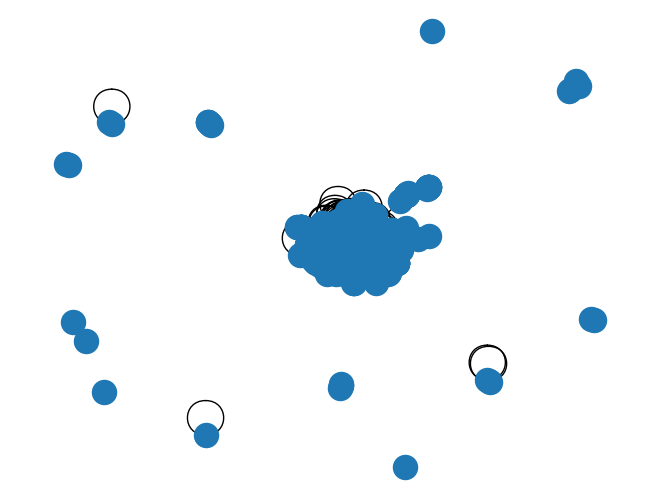

In [178]:
import matplotlib.pyplot as plt
nx.draw(H)

In [187]:
degree = H.degree()
degree

DegreeView({1: 34, 2: 10, 4: 51, 5: 19, 6: 16, 13: 17, 14: 50, 18: 35, 19: 7, 22: 28, 26: 30, 29: 7, 32: 39, 37: 17, 39: 9, 41: 17, 43: 11, 44: 59, 45: 9, 47: 11, 49: 28, 50: 19, 51: 7, 52: 2, 55: 13, 56: 14, 57: 9, 60: 16, 61: 44, 64: 23, 65: 10, 70: 19, 72: 14, 74: 25, 77: 25, 81: 37, 88: 47, 90: 24, 94: 19, 95: 47, 98: 19, 99: 31, 101: 39, 102: 13, 103: 15, 104: 28, 106: 55, 109: 20, 110: 10, 113: 46, 120: 22, 122: 13, 123: 27, 126: 11, 127: 68, 128: 26, 129: 20, 130: 26, 133: 42, 134: 14, 138: 22, 141: 11, 142: 22, 145: 13, 147: 12, 150: 14, 151: 9, 155: 9, 156: 14, 157: 27, 159: 42, 160: 4, 165: 15, 167: 28, 173: 59, 176: 47, 180: 8, 183: 10, 185: 12, 186: 18, 187: 140, 188: 10, 191: 21, 196: 35, 197: 122, 203: 18, 205: 10, 206: 24, 210: 20, 212: 100, 213: 17, 216: 38, 217: 8, 218: 19, 222: 26, 224: 14, 227: 16, 229: 6, 230: 23, 233: 7, 234: 10, 238: 52, 239: 3, 240: 28, 246: 20, 247: 5, 248: 13, 252: 30, 254: 32, 256: 14, 257: 24, 262: 5, 264: 4, 270: 29, 277: 22, 280: 18, 283: 2

In [188]:
nx.degree_centrality(H)

{1: 0.003982197235886624,
 2: 0.0011712344811431249,
 4: 0.0059732958538299364,
 5: 0.0022253455141719373,
 6: 0.0018739751698289998,
 13: 0.001991098617943312,
 14: 0.005856172405715624,
 18: 0.004099320684000937,
 19: 0.0008198641368001874,
 22: 0.0032794565472007496,
 26: 0.0035137034434293748,
 29: 0.0008198641368001874,
 32: 0.004567814476458187,
 37: 0.001991098617943312,
 39: 0.0010541110330288123,
 41: 0.001991098617943312,
 43: 0.0012883579292574374,
 44: 0.006910283438744436,
 45: 0.0010541110330288123,
 47: 0.0012883579292574374,
 49: 0.0032794565472007496,
 50: 0.0022253455141719373,
 51: 0.0008198641368001874,
 52: 0.00023424689622862497,
 55: 0.0015226048254860622,
 56: 0.0016397282736003748,
 57: 0.0010541110330288123,
 60: 0.0018739751698289998,
 61: 0.00515343171702975,
 64: 0.0026938393066291873,
 65: 0.0011712344811431249,
 70: 0.0022253455141719373,
 72: 0.0016397282736003748,
 74: 0.002928086202857812,
 77: 0.002928086202857812,
 81: 0.004333567580229562,
 88: 0.00

# The nodes are more likely to jump to  another  page rather than to follow a link which could be understood from the value of alpha in page rank

In [193]:
pr = nx.pagerank(H, alpha=0.1)
pr

{1: 0.00011291885456159548,
 2: 0.00011670887777230571,
 4: 0.00012337068282281,
 5: 0.00011579666827142289,
 6: 0.00010948281705420125,
 13: 0.00011310190722862617,
 14: 0.0001249466387327455,
 18: 0.00011097908355971481,
 19: 0.00010783453279157244,
 22: 0.00011663533975003426,
 26: 0.00011405880303896615,
 29: 0.00011267028122110482,
 32: 0.0001250644690138689,
 37: 0.0001109032557107974,
 39: 0.000111931447777899,
 41: 0.00012073895528032888,
 43: 0.00010920958019858041,
 44: 0.00011627307507036299,
 45: 0.00011107154917749282,
 47: 0.00011299925985065723,
 49: 0.00012251256769325452,
 50: 0.00010898643849992791,
 51: 0.00011244405018589268,
 52: 0.00011314518225664856,
 55: 0.0001122641255458786,
 56: 0.00011408006302653197,
 57: 0.00011162363120140744,
 60: 0.00010876045459777762,
 61: 0.0001516228401382354,
 64: 0.00011163326050778487,
 65: 0.00011193461775187216,
 70: 0.00011698310787497181,
 72: 0.00011357635544427845,
 74: 0.0001165537233672241,
 77: 0.00011225867329002427,
 